# Linear Regression With Multiple Features #

## Problem Statement:
* We will use the motivating example of housing price prediction. The training data set contains many examples with 4 features (size, bedrooms, floors and age) and corresponding a target value.

    * We would like to build a linear regression model using these values so we can then predict the price for other houses - say, a house with 1200 sqft, 3 bedrooms, 1 floor, 40 years old

## Solution:

***Import Necessary Libraries***

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import math

***compute_cost: Function to Calculate Cost during the learning process***

In [19]:
def compute_cost (X, y, w, b):
    """
    X = 2d array of (m, n) dimensions : m examples, n features
    y = (m, ) nd array                : targets
    w = (n, ) nd array                : models parameters
    b = scalar                        : models parameters
    """
    m = X.shape[0]  # no of training examples
    cost = 0.0

    for i in range (m):
        f_wb_i = np.dot(w, X[i]) + b
        error = f_wb_i - y[i]

        cost = cost + error ** 2

    cost = cost / (2 * m)

    return cost

***compute_gradient: Function to calculate gradient or derivatives dj_dw, dj_db***

In [20]:
def compute_gradient(X, y, w, b):
    """
    X = 2d array of (m, n) dimensions : m examples, n features
    y = (m, ) nd array                : targets
    w = (n, ) nd array                : models parameters
    b = scalar                        : models parameters

    Returns:
    dj_dw (ndarray (n,)): The gradient of the cost w.r.t. the parameters w.
    dj_db (scalar):       The gradient of the cost w.r.t. the parameter b.
    """

    m , n = X.shape # m = no of training set, n = no of features
    
    dj_dw = np.zeros(n, )
    dj_db = 0.0

    for i in range (m):
        f_wb_i = np.dot(w, X[i]) + b
        error = f_wb_i - y[i]

        dj_db = dj_db + error

        for j in range (n):
            dj_dw[j] = dj_dw[j] + (error * X[i, j])

    dj_dw = dj_dw / m
    dj_db = dj_db / m

    return dj_dw, dj_db

***gradient_descent: this function applies batch gradient to find the appropriate value for parameters w and b that minimises the cost***

In [21]:
def gradient_descent(X, y, w_in, b_in, alpha, no_of_iterations):

    w = w_in
    b = b_in
    J_history = [] # useful for plot
    
    for i in range (no_of_iterations):
        
        # find the values of gradient/derivatives
        dj_dw , dj_db = compute_gradient(X, y, w, b)
        # update the parameters
        w = w - alpha * dj_dw
        b = b - alpha * dj_db

        # calculate cost for current values of w and b
        cost = compute_cost(X, y, w, b)

        # save cost J at each iteration
        if (i < no_of_iterations):
            J_history.append(cost)
        # Print cost every at intervals 10 times or as many iterations if < 10
        if i % math.ceil(no_of_iterations / 10) == 0:
            print(f"Iteration {i:4d}: Cost {J_history[-1]:8.2f}   ")

    return w, b, J_history  # returns final value of w and b, J_history is required for graphing purpose

***Normalize: this function scale all the features by using z-score***

In [22]:
def z_score_normalize(X):
    # find the mean of each column / feature
    mu = np.mean(X, axis=0)
    # find the standard deviation of each column/feature
    sigma = np.std(X, axis=0)

    # normalize data using z_score
    X_norm = (X - mu) / sigma

    return X_norm, mu, sigma

### Main Functions Starts From Here

#### Step 1: Load the text files / dataset

In [23]:
# load the data from text file
data = np.loadtxt("houses.txt", delimiter = ',')

# extract all the rows of first 4 columns as features
X_train = data[:,:4]
# extract all the rows of fifth columns as target
y_train = data[:, 4]

In [25]:
# type of X_train 
print("Type of X_train: ", type(X_train))
print("First 5 elements of X trains:\n", X_train[:5])

Type of X_train:  <class 'numpy.ndarray'>
First 5 elements of X trains:
 [[9.520e+02 2.000e+00 1.000e+00 6.500e+01]
 [1.244e+03 3.000e+00 1.000e+00 6.400e+01]
 [1.947e+03 3.000e+00 2.000e+00 1.700e+01]
 [1.725e+03 3.000e+00 2.000e+00 4.200e+01]
 [1.959e+03 3.000e+00 2.000e+00 1.500e+01]]


In [26]:
# type of y_train
print("Type of y_train: ", type(y_train))
print("First 5 elements of y trains:\n", y_train[:5])

Type of y_train:  <class 'numpy.ndarray'>
First 5 elements of y trains:
 [271.5 300.  509.8 394.  540. ]


In [27]:
# dimension of dataset
print("The shape of X_train is : ", X_train.shape)
print("The shape of y_train is : ", y_train.shape)
print("Number of training example: m = ", len(X_train))

The shape of X_train is :  (100, 4)
The shape of y_train is :  (100,)
Number of training example: m =  100


### Step 2: Visualize Dataset ###

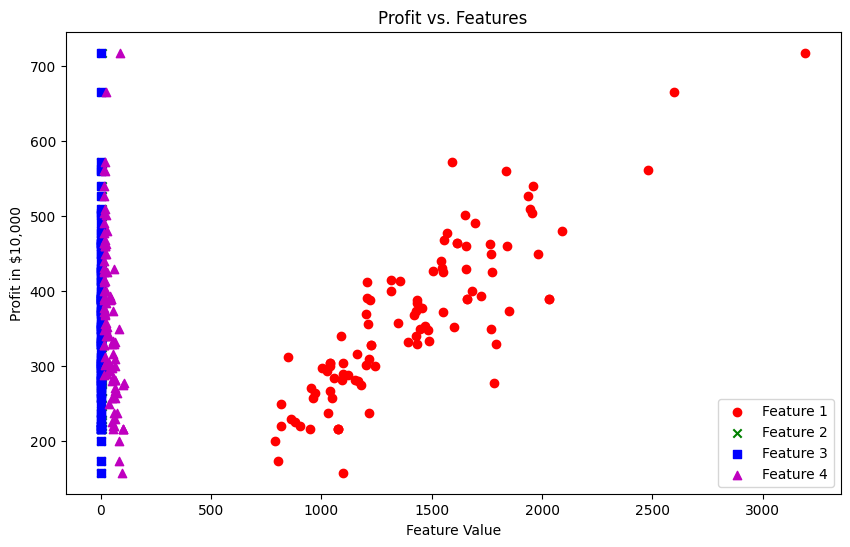

In [28]:
m, n = X_train.shape

# Create a scatter plot for each feature
plt.figure(figsize=(10, 6))

markers = ['o', 'x', 's', '^']  # Different markers for each feature
colors = ['r', 'g', 'b', 'm']   # Different colors for each feature

for i in range(n):
    plt.scatter(X_train[:, i], y_train, 
                marker=markers[i % len(markers)], 
                color=colors[i % len(colors)], 
                label=f'Feature {i+1}')

# Set the title and labels
plt.title("Profit vs. Features")
plt.xlabel("Feature Value")
plt.ylabel('Profit in $10,000')

# Add a legend
plt.legend()

# Show the plot
plt.show()

### Step 3: Feature Scaling ###
* Here I use ***Z-score normalization*** method to scale all the feature

In [29]:
X_train, X_mu, X_sigma = z_score_normalize(X_train)

### Step 4: Now Visualize the dataset ### 

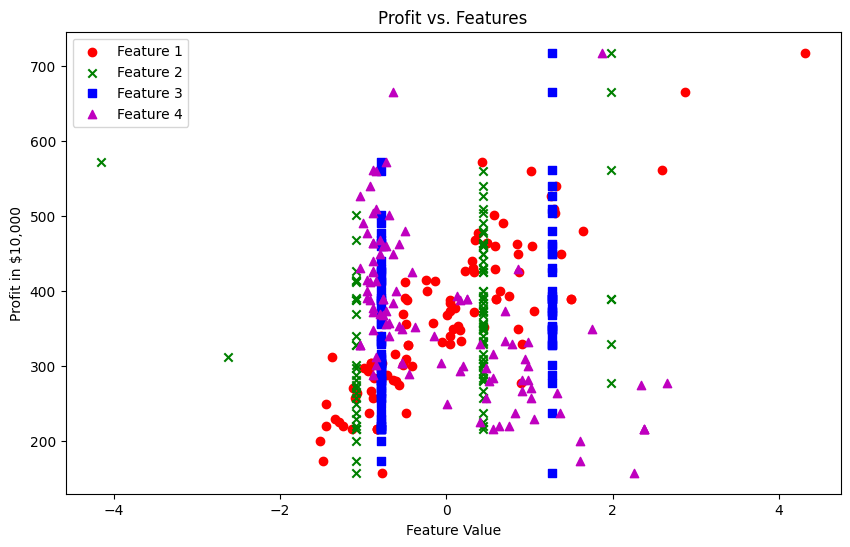

In [30]:
m, n = X_train.shape

# Create a scatter plot for each feature
plt.figure(figsize=(10, 6))

markers = ['o', 'x', 's', '^']  # Different markers for each feature
colors = ['r', 'g', 'b', 'm']   # Different colors for each feature

for i in range(n):
    plt.scatter(X_train[:, i], y_train, 
                marker=markers[i % len(markers)], 
                color=colors[i % len(colors)], 
                label=f'Feature {i+1}')

# Set the title and labels
plt.title("Profit vs. Features")
plt.xlabel("Feature Value")
plt.ylabel('Profit in $10,000')

# Add a legend
plt.legend()

# Show the plot
plt.show()

### Step 5: Initialize the Parameters ###

In [31]:
w_init = np.zeros(n, )
b_init = 0.0

alpha = 0.1
no_of_iterations = 10000

### Step 6: Run Gradient Descent Until Converge

In [32]:
w_final, b_final, J_history = gradient_descent (X_train, y_train, w_init, b_init, alpha, no_of_iterations)

print(w_final)
print(b_final)


Iteration    0: Cost 57326.42   
Iteration 1000: Cost   219.71   
Iteration 2000: Cost   219.71   
Iteration 3000: Cost   219.71   
Iteration 4000: Cost   219.71   
Iteration 5000: Cost   219.71   
Iteration 6000: Cost   219.71   
Iteration 7000: Cost   219.71   
Iteration 8000: Cost   219.71   
Iteration 9000: Cost   219.71   
[110.61335173 -21.47323884 -32.66070323 -37.77938362]
362.2395199999998


### Step 7: Cost VS Iterations plot: ***This plot help us to understand gradient descent is working or not***

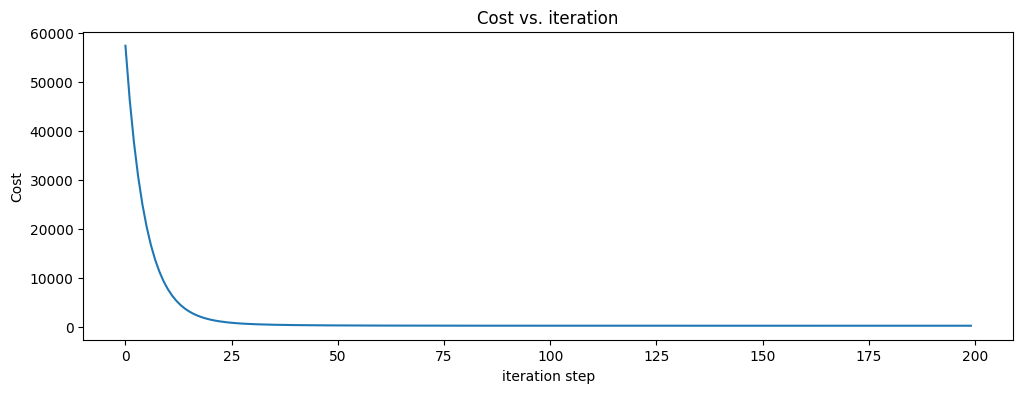

In [33]:
# plot cost versus iteration  
plt.figure(figsize = (12, 4))
plt.plot(J_history[:200])

# labeling
plt.title("Cost vs. iteration") 
plt.ylabel('Cost')
plt.xlabel('iteration step')
# to show the plot
plt.show()

### Step 8: Predictions

Let's predict the price of a house with 1200 sqft, 3 bedrooms, 1 floor, 40 years old.

**Notes:**
* ***Any predictions using the parameters learned from a normalized training set must also be normalized.***
* ***We must normalize the data with the mean and standard deviation derived when the training data was normalized.***

In [34]:
x_house = np.array([1200, 3, 1, 40])
x_house_norm = (x_house - X_mu) / (X_sigma)

print(x_house_norm)

prediction = np.dot(w_final, x_house_norm) + b_final

print(f" predicted price of a house with 1200 sqft, 3 bedrooms, 1 floor, 40 years old = ${prediction *1000:0.0f}")

[-0.51849608  0.44436943 -0.78288136  0.05235597]
 predicted price of a house with 1200 sqft, 3 bedrooms, 1 floor, 40 years old = $318936
